# 09.12
## 인공신경망을 이용한 붓꽃 분리

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

# df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
names = ['꽃받침 길이','꽃받침 넓이','꽃잎 길이','꽃잎 넓이','품종']
df = pd.read_csv('iris.csv', names=names)
df

,꽃받침 길이,꽃받침 넓이,꽃잎 길이,꽃잎 넓이,품종
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [72]:
df2 = df.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   꽃받침 길이  150 non-null    float64
 1   꽃받침 넓이  150 non-null    float64
 2   꽃잎 길이   150 non-null    float64
 3   꽃잎 넓이   150 non-null    float64
 4   품종      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [73]:
df2['품종'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [74]:
df2['품종'] = df2['품종'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
df2.head()

,꽃받침 길이,꽃받침 넓이,꽃잎 길이,꽃잎 넓이,품종
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [75]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   꽃받침 길이  150 non-null    float64
 1   꽃받침 넓이  150 non-null    float64
 2   꽃잎 길이   150 non-null    float64
 3   꽃잎 넓이   150 non-null    float64
 4   품종      150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [76]:
df.isna().sum()

꽃받침 길이    0
꽃받침 넓이    0
꽃잎 길이     0
꽃잎 넓이     0
품종        0
dtype: int64

In [77]:
y = df2['품종']
X = df2.drop(['품종'],axis=1)
print(X)
print(y)

     꽃받침 길이  꽃받침 넓이  꽃잎 길이  꽃잎 넓이
0       5.1     3.5    1.4    0.2
1       4.9     3.0    1.4    0.2
2       4.7     3.2    1.3    0.2
3       4.6     3.1    1.5    0.2
4       5.0     3.6    1.4    0.2
..      ...     ...    ...    ...
145     6.7     3.0    5.2    2.3
146     6.3     2.5    5.0    1.9
147     6.5     3.0    5.2    2.0
148     6.2     3.4    5.4    2.3
149     5.9     3.0    5.1    1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: 품종, Length: 150, dtype: int64


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [79]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
# 모델 생성
model = keras.Sequential(
    [
        keras.layers.Dense(4),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation='softmax')
    ]
)
# 컴파일
# binary_crossentropy : 이항 분류
# sparse_categorical_crossentropy : 다항 분류
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 학습
EPOCHS=300
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.1667 - loss: 1.1469 - val_accuracy: 0.2667 - val_loss: 1.1084
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3417 - loss: 1.0671 - val_accuracy: 0.5667 - val_loss: 1.0215
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6250 - loss: 0.9644 - val_accuracy: 0.7000 - val_loss: 0.9454
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6833 - loss: 0.9075 - val_accuracy: 0.8000 - val_loss: 0.8782
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7333 - loss: 0.8415 - val_accuracy: 0.8333 - val_loss: 0.8191
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7417 - loss: 0.7888 - val_accuracy: 0.8667 - val_loss: 0.7655
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7167 - loss: 0.7457 - val_accuracy: 0.8667 - val_loss: 0.7180
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7333 - loss: 0.7129 - val_accuracy: 0.8667 - val_loss:

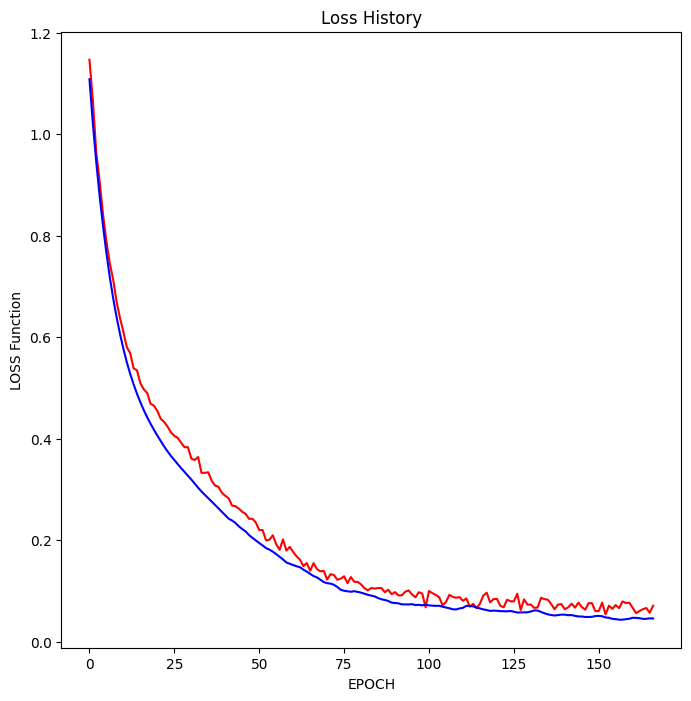

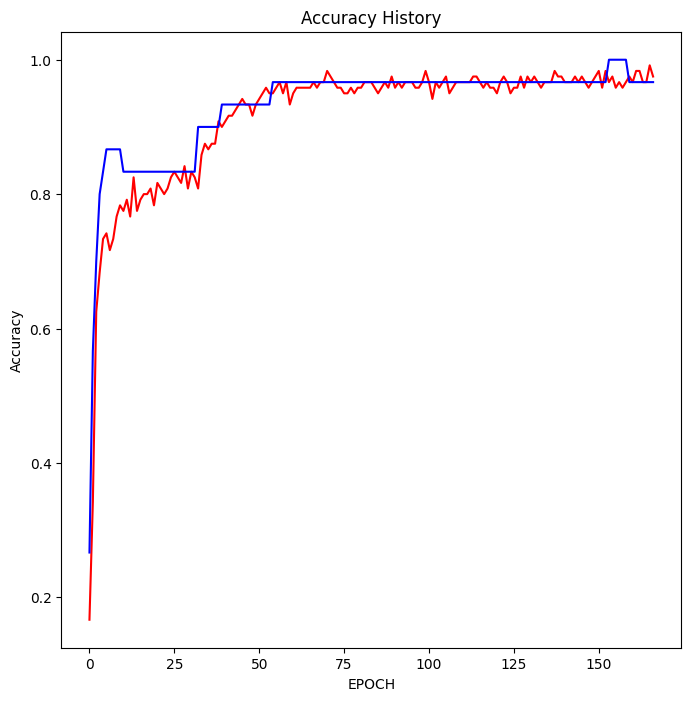

In [81]:
train_history = history.history["loss"]
validation_history = history.history["val_loss"]
fig = plt.figure(figsize=(8, 8))
plt.title("Loss History")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
plt.show()
fig.savefig("train_history.png")

train_history = history.history["accuracy"]
validation_history = history.history["val_accuracy"]
fig = plt.figure(figsize=(8, 8))
plt.title("Accuracy History")
plt.xlabel("EPOCH")
plt.ylabel("Accuracy")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
plt.show()
fig.savefig("accuracy_history.png")

In [82]:
iris_types = {0: "Iris-setosa", 1: "Iris-versicolor", 2: "Iris-virginica"}

In [83]:
pred = model.predict(X_test)
predicted_classes = np.argmax(pred, axis=1)
predicted_iris_types = [iris_types[i] for i in predicted_classes]

correct_iris_types = [iris_types[i] for i in y_test]

# 결과 출력
list(zip(correct_iris_types,predicted_iris_types))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


[('Iris-versicolor', 'Iris-versicolor'),
 ('Iris-setosa', 'Iris-setosa'),
 ('Iris-virginica', 'Iris-virginica'),
 ('Iris-versicolor', 'Iris-versicolor'),
 ('Iris-versicolor', 'Iris-versicolor'),
 ('Iris-setosa', 'Iris-setosa'),
 ('Iris-versicolor', 'Iris-versicolor'),
 ('Iris-virginica', 'Iris-virginica'),
 ('Iris-versicolor', 'Iris-virginica'),
 ('Iris-versicolor', 'Iris-versicolor'),
 ('Iris-virginica', 'Iris-virginica'),
 ('Iris-setosa', 'Iris-setosa'),
 ('Iris-setosa', 'Iris-setosa'),
 ('Iris-setosa', 'Iris-setosa'),
 ('Iris-setosa', 'Iris-setosa'),
 ('Iris-versicolor', 'Iris-versicolor'),
 ('Iris-virginica', 'Iris-virginica'),
 ('Iris-versicolor', 'Iris-versicolor'),
 ('Iris-versicolor', 'Iris-versicolor'),
 ('Iris-virginica', 'Iris-virginica'),
 ('Iris-setosa', 'Iris-setosa'),
 ('Iris-virginica', 'Iris-virginica'),
 ('Iris-setosa', 'Iris-setosa'),
 ('Iris-virginica', 'Iris-virginica'),
 ('Iris-virginica', 'Iris-virginica'),
 ('Iris-virginica', 'Iris-virginica'),
 ('Iris-virginica